In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [2]:
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

### Пространственный спектр

In [20]:
wavelength = 532 # nm
distance = 139 # cm
spectrum = pd.DataFrame({'n':[7, 9, 17, 29, 46],
                         'l':[223, 197, 198, 173, 207]})
spectrum['n'] -= 1
# mm

In [33]:
spectrum['ls'] = spectrum.l / spectrum.n
spectrum['angle'] = spectrum.ls / distance / 10
spectrum['period'] = wavelength / 1e3 /spectrum.angle # mkm
spectrum['error'] = spectrum['period'] * np.sqrt((3 / spectrum['l']) ** 2 + 5e-5)

# spectrum.to_excel("spectrum.xlsx")
spectrum

,n,l,ls,angle,period,error
0,6,223,37.166667,0.026739,19.896323,0.302385
1,8,197,24.625000,0.017716,30.029645,0.504199
2,16,198,12.375000,0.008903,59.755960,0.999138
3,28,173,6.178571,0.004445,119.684624,2.241370
4,45,207,4.600000,0.003309,160.756522,2.592320


### Микроскоп

In [34]:
microscope = pd.DataFrame({'n':[30, 30, 15, 6, 6],
                           'l':[44, 65, 101, 79, 102],
                            'delta':[0.5, 1, 1, 3, 4]})
# microscope['n'] -= 1
a_1 = 14
a_2 = 2.5
b_1 = 87 - 2.5
b_2 = 40
magnification = b_1 * b_2 / a_1 / a_2
microscope['ls'] = microscope.l / microscope.n
microscope['period'] = microscope.ls / magnification * 1000
microscope['error'] = microscope.period * np.sqrt( (microscope.delta / microscope.l) ** 2 + 5e-3)
# microscope.to_excel("microscope.xlsx")
microscope

,n,l,delta,ls,period,error
0,30,44,0.5,1.466667,15.187377,1.087689
1,30,65,1.0,2.166667,22.435897,1.623573
2,15,101,1.0,6.733333,69.723866,4.978318
3,6,79,3.0,13.166667,136.341223,10.943094
4,6,102,4.0,17.000000,176.035503,14.233720


### Разрешающая способность

In [37]:
resolution = pd.DataFrame({'D':[None, 330, 150, 110, 70]})
resolution.D *= 10
resolution['period'] = wavelength * 2 * 110  / resolution.D
resolution['error'] = resolution.period * 500 / resolution.D
# resolution.to_excel("resolution.xlsx")
resolution

,D,period,error
0,NaN,NaN,NaN
1,3300.0,35.466667,5.373737
2,1500.0,78.026667,26.008889
3,1100.0,106.400000,48.363636
4,700.0,167.200000,119.428571


### График

[0.00030303 0.00066667 0.00090909 0.00142857] [ 30.02964467  59.7559596  119.68462428 160.75652174]


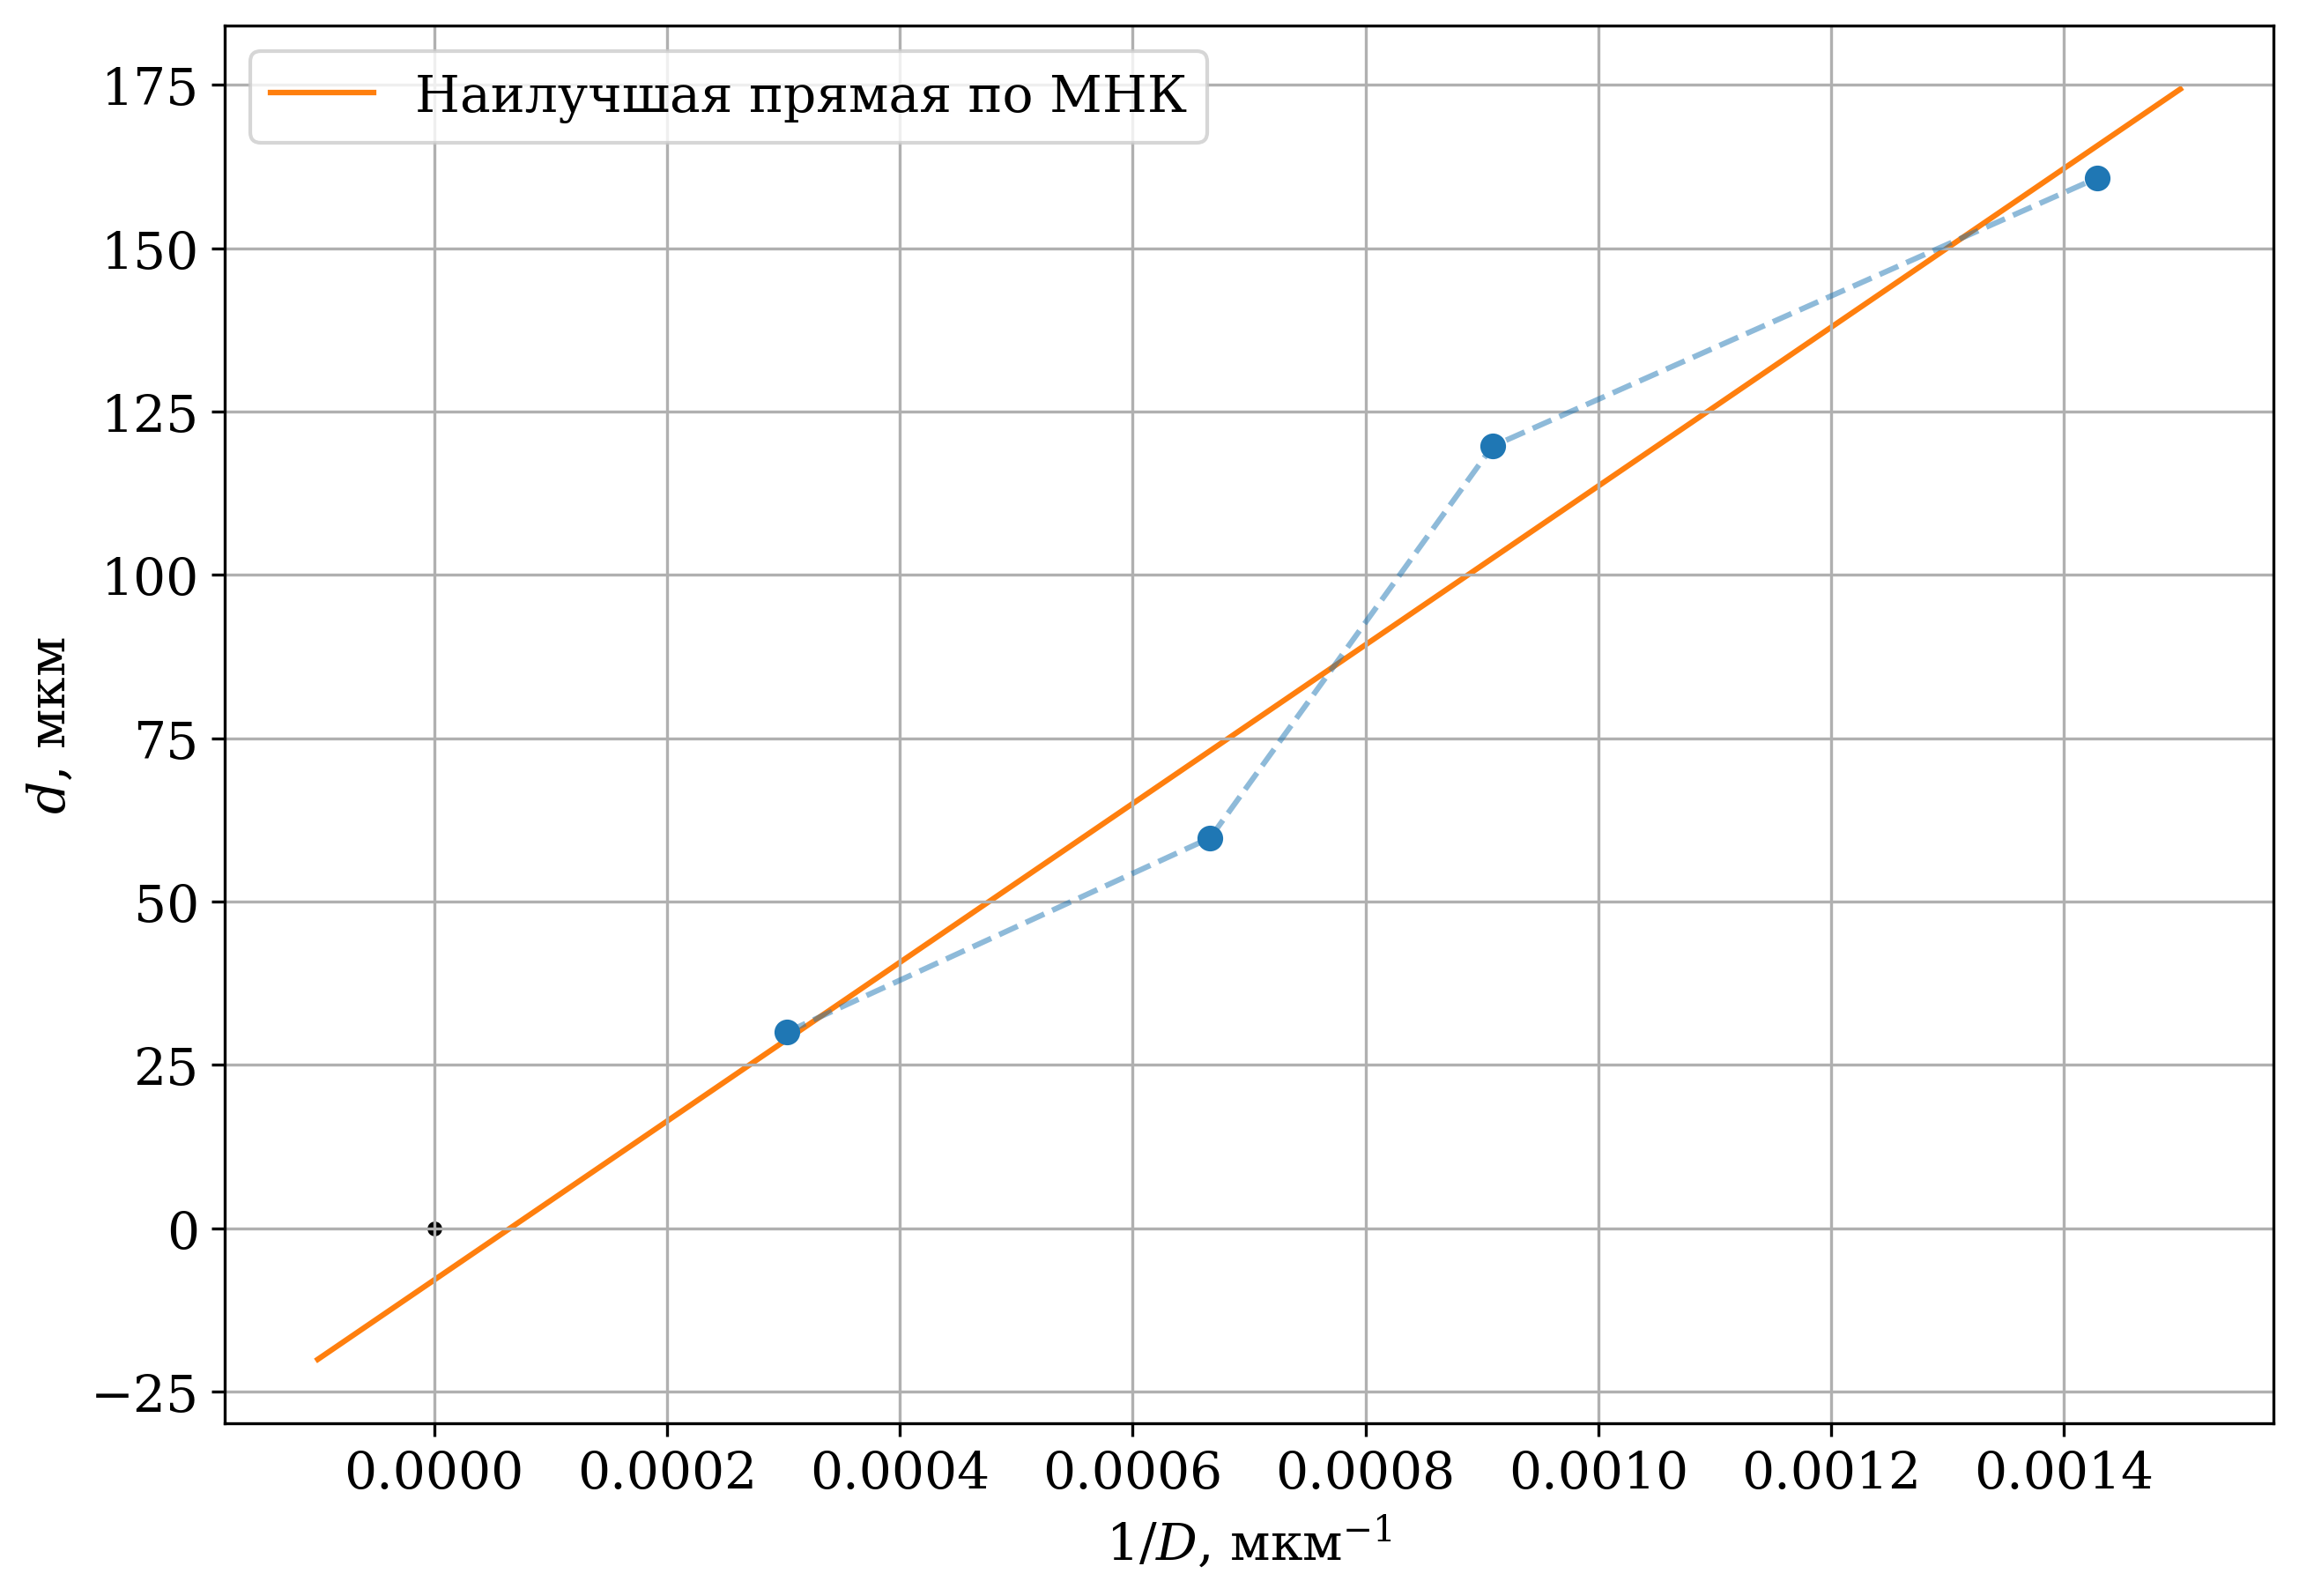

In [77]:
x = np.array(1/resolution.D)[1:]
y = np.array(spectrum.period)[1:]
print(x, y)

plt.scatter(x, y)
plt.plot(x, y, ls='--', alpha=0.5)

arg = np.polyfit(x, y, 1)
f = np.poly1d(arg)

x_ = np.linspace(-0.0001, 0.0015, 10)
plt.plot(x_, f(x_), zorder=0.5, label="Наилучшая прямая по МНК")

plt.scatter(0, 0, color='black', marker='.')

plt.xlabel("$1/D$, мкм$^{-1}$")
plt.ylabel("$d$, мкм")
plt.legend()

plt.savefig("plot.pdf")